In [113]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

# Adjacency Processing

**In this notebook, we want to generate the CSV files to run Gephi and produce nice graphs by applying the theory we learn there**

# Part 1: Marvel dataset

**First we will produces a CSV file with name and the URL (ID)**

In [114]:
with open('data/clean_marvel.txt', 'rb') as f:
    characters_marvel = pickle.load(f)

**We create a label base on the `Real Name` and the `Current Alias`.**

In [102]:
characters_marvel["Label"]= characters_marvel["Real Name"] +" (" + characters_marvel["Current Alias"] + ")"
characters_marvel

,URL,Real Name,Current Alias,Relatives,Affiliation,Subcomic URL,First appearance,Last appearance,Label
0,/wiki/Aaron_Fox_(Earth-616),Aaron Fox,Unknown,[/wiki/Beth_Fox_(Earth-616)],[],[/wiki/Legion_of_Monsters_Vol_1_1Manphibian: V...,1975,1975,Aaron Fox (Unknown)
1,/wiki/Acrobat_(1940s)_(Earth-616),Unknown,Acrobat,[],[],[/wiki/Captain_America_Comics_Vol_1_64Death Is...,1947,1947,Unknown (Acrobat)
2,/wiki/Abigail_Mercury_(Clone)_(Earth-616),Abigail Mercury,Unknown,[/wiki/Abigail_Mercury_(Earth-616)],[],[/wiki/Ben_Reilly:_Scarlet_Spider_Vol_1_1st st...,2017,2017,Abigail Mercury (Unknown)
3,/wiki/Ace_Maxwell_(Earth-616),Ace Maxwell,Unknown,[],[],[/wiki/Human_Torch_Comics_Vol_1_22The Fatal Fi...,1946,1946,Ace Maxwell (Unknown)
4,/wiki/Abigail_Boylen_(Earth-616),"Abigail ""Abby"" Boylen",Cloud 9,[],"[/wiki/Champions_(Earth-616), /wiki/Undergroun...",[/wiki/Mighty_Avengers_Vol_1_1The Mighty Aveng...,2007,2019,"Abigail ""Abby"" Boylen (Cloud 9)"
...,...,...,...,...,...,...,...,...,...
26877,/wiki/Zzzyclone_(Warp_World)_(Earth-616),Zzzyclone,Unknown,[],[],[/wiki/Secret_Warps:_Soldier_Supreme_Annual_Vo...,2019,2019,Zzzyclone (Unknown)
26878,/wiki/Zuhn_(Earth-616),Zuhn,Chimera,[],[],[/wiki/Marvel:_The_Lost_Generation_Vol_1_4Ligh...,2000,2001,Zuhn (Chimera)
26879,/wiki/Zxaxz_(Earth-616),Zxaxz,Unknown,[],[],"[/wiki/Spellbound_Vol_2_2Nightmare!, /wiki/Spe...",1988,2010,Zxaxz (Unknown)
26880,/wiki/Zuwena_(Earth-616),Zuwena,Unknown,[],[/wiki/Elephant%27s_Trunk_(Earth-616)],[/wiki/Marvel_Universe_Magazine_Fall_Vol_1_1Th...,2018,2019,Zuwena (Unknown)


**We only keep the columns that interest us. Then we save it as CSV file**

In [103]:
characters_marvel = characters_marvel[["URL","Label"]]
characters_marvel.columns = ["Id","Label"]
characters_marvel.to_csv("nodes_marvel.csv",index = False)

### Part 1.1: Relatives

**As we will do same process to save the edges we build a function for it.**

In [104]:
def save_edge(universe, attribute, year):
    if year is not "":
        file_source = "data/adj_" + attribute + "_" + universe + "_" + year +".txt"
        file_dest = "data/edge_" + attribute + "_" + universe + "_" + year + ".csv"
    else:
        file_source = "data/adj_" + attribute + "_" + universe + ".txt"
        file_dest = "data/edge_" + attribute + "_" + universe + ".csv"
    with open(file_source, 'rb') as f:
        adj = pickle.load(f)
    np.fill_diagonal(adj.values, 0)
    the_list = []
    for source in adj.index:
        for target in adj[adj[source]>0].index:
            # Only lower triangular part of the matrix
            if adj.index.get_loc(source) < adj.index.get_loc(target):
                the_list.append([source, target, adj.loc[source,target]])
    edge = pd.DataFrame(the_list, columns=['Source','Target', 'Weight'])
    edge.insert(2, 'Type', 'Undirected')
    edge
    edge.to_csv(file_dest,index = False)

**We apply this function for the selected year**

In [70]:
save_edge("marvel","relat","50")
save_edge("marvel","relat","90")
save_edge("marvel","relat","")

### Part 1.2: Affiliations

In [71]:
save_edge("marvel","aff","50")
save_edge("marvel","aff","90")
save_edge("marvel","aff","")

### Part 1.3: Comics

In [72]:
save_edge("marvel","comics","50")
save_edge("marvel","comics","90")
save_edge("marvel","comics","")

### Part 1.4: Combinaison of all the adjacency matrices

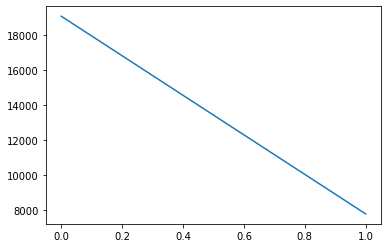

In [115]:
with open("data/adj_relat_marvel.txt", 'rb') as f:
            adj_relat = pickle.load(f)
    np.fill_diagonal(adj_relat.values, 0)

deg_relat = np.max(adj_relat[adj_relat.index])
unique, counts = np.unique(deg_relat, return_counts=True)
plt.plot(unique,counts)

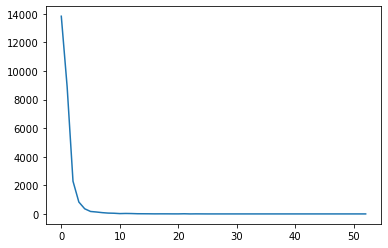

In [116]:
with open("data/adj_aff_marvel.txt", 'rb') as f:
        adj_aff = pickle.load(f)
np.fill_diagonal(adj_aff.values, 0)

deg_aff = np.max(adj_aff[adj_aff.index])
unique, counts = np.unique(deg_aff, return_counts=True)
plt.plot(unique,counts)

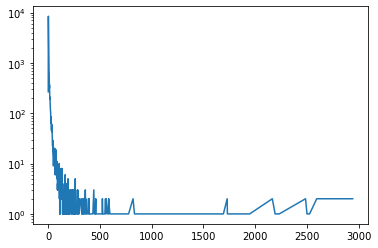

In [117]:
with open("data/adj_comics_marvel.txt", 'rb') as f:
        adj_comics = pickle.load(f)
np.fill_diagonal(adj_comics.values, 0)

deg_comics = np.max(adj_comics[adj_comics.index])
unique, counts = np.unique(deg_comics, return_counts=True)
plt.semilogy(unique,counts)

**Since all the attributes don't have the same maximum value, we decide to normalize the weight by the maximum.**

In [121]:
def save_tot_edges(universe, year):
    if year is not "":
        file_source_relat = "data/adj_relat_" + universe + "_" + year +".txt"
        file_source_aff = "data/adj_aff_" + universe + "_" + year +".txt"
        file_source_comics = "data/adj_comics_" + universe + "_" + year +".txt"
        file_dest = "data/edge_tot_" + universe + "_" + year + ".csv"
    else:
        file_source_relat = "data/adj_relat_" + universe +".txt"
        file_source_aff = "data/adj_aff_" + universe +".txt"
        file_source_comics = "data/adj_comics_" + universe  +".txt"
        file_dest = "data/edge_tot_" + universe + ".csv"
        
    with open(file_source_relat, 'rb') as f:
            adj_relat = pickle.load(f)
    np.fill_diagonal(adj_relat.values, 0)
    
    with open(file_source_aff, 'rb') as f:
            adj_aff = pickle.load(f)
    np.fill_diagonal(adj_aff.values, 0)
    
    with open(file_source_comics, 'rb') as f:
            adj_comics = pickle.load(f)
    np.fill_diagonal(adj_comics.values, 0)
    
    adj_relat_coef = adj_relat/np.max(np.max(adj_relat))
    adj_aff_coef = adj_aff/np.max(np.max(adj_aff))
    adj_comics_coef = adj_comics/np.max(np.max(adj_comics))
    
    adj_tot = adj_aff_coef.add(adj_relat_coef, fill_value=0)
    adj_tot = adj_tot.add(adj_comics_coef, fill_value=0)
    
    the_list = []
    for source in adj_tot.index:
        for target in adj_tot[adj_tot[source]>0].index:
            # Only lower triangular part of the matrix
            if adj_tot.index.get_loc(source) < adj_tot.index.get_loc(target):
                the_list.append([source, target, adj_tot.loc[source,target]])
    edge = pd.DataFrame(the_list, columns=['Source','Target', 'Weight'])
    edge.insert(2, 'Type', 'Undirected')
    edge
    edge.to_csv(file_dest,index = False)

In [123]:
save_tot_edges("marvel", "50")
save_tot_edges("marvel", "90")
save_tot_edges("marvel", "")

# Part 2: DC dataset

**We apply the same process for DC**

In [63]:
with open('data/clean_dc.txt', 'rb') as f:
    characters_dc = pickle.load(f)

In [64]:
characters_dc["Label"]= characters_dc["Real Name"] +" (" + characters_dc["Current Alias"] + ")"
characters_dc

,URL,Real Name,Current Alias,Relatives,Affiliation,Subcomic URL,First appearance,Last appearance,Label
0,/wiki/Aaron_Hayley_(New_Earth),Aaron Hayley,Swamp Thing,[],[],[/wiki/Swamp_Thing:_Rootshe 1st Stor],1998.0,1998.0,Aaron Hayley (Swamp Thing)
1,/wiki/Adam_Strange_(JSA:_The_Golden_Age),Adam Strange,Adam Strange,[],[],[/wiki/Golden_Age_Vol_1_4Book 4],1994.0,1994.0,Adam Strange (Adam Strange)
2,/wiki/Alan_Barnes_(New_Earth),Alan Barnes,Brainstorm,[],[],[/wiki/S.T.A.R._Corps_Vol_1_6Shooting S.T.A.R....,1994.0,1994.0,Alan Barnes (Brainstorm)
3,/wiki/Alan_Scott_(Earth_2),Alan Scott,Green Lantern,[/wiki/Sam_Zhao_(Earth_2)],"[/wiki/Wonders_of_the_World, /wiki/The_Green]",[/wiki/Convergence:_Booster_Gold_Vol_1_2Diverg...,2012.0,2019.0,Alan Scott (Green Lantern)
4,/wiki/Abigail_Arcane_(New_Earth),Abigail Arcane,Abigail Arcane,"[/wiki/Swamp_Thing_(New_Earth), /wiki/Tef%C3%A...",[],[/wiki/The_Best_of_DC_Vol_1_52Stopover in a Pl...,1973.0,2006.0,Abigail Arcane (Abigail Arcane)
...,...,...,...,...,...,...,...,...,...
13184,/wiki/Zod_(Smallville),Zod,General Zod,"[/wiki/Faora_(Smallville), /wiki/Davis_Bloome_...",[],[/wiki/Smallville_Season_11_Special_Vol_1_3Hol...,2013.0,2013.0,Zod (General Zod)
13185,/wiki/Zazzala_(Prime_Earth),Zazzala,Queen Bee,[],[],[/wiki/Wonder_Twins_Vol_1_4A Date Which Will L...,2019.0,2019.0,Zazzala (Queen Bee)
13186,/wiki/Zedabon_Zarr_(Earth-One),Zedabon Zarr,Breakaway Bandit,[],[],[/wiki/The_Flash_Vol_1_158Battle Against The B...,1966.0,1966.0,Zedabon Zarr (Breakaway Bandit)
13187,/wiki/Zotan_(Earth-S),Zotan,Zotan,[],[],[/wiki/Marvel_Family_Vol_1_88The Marvel Family...,1953.0,1974.0,Zotan (Zotan)


In [65]:
characters_dc = characters_dc[["URL","Label"]]
characters_dc.columns = ["Id","Label"]
characters_dc.to_csv("data/nodes_dc.csv",index = False)

### Part 1.1: Relatives

In [73]:
save_edge("dc","relat","50")
save_edge("dc","relat","90")
save_edge("dc","relat","")

### Part 1.2: Affiliations

In [74]:
save_edge("dc","aff","50")
save_edge("dc","aff","90")
save_edge("dc","aff","")

### Part 1.3: Comics

In [75]:
save_edge("dc","comics","50")
save_edge("dc","comics","90")
save_edge("dc","comics","")

### Part 1.4: Combinaison of all the adjacency matrices

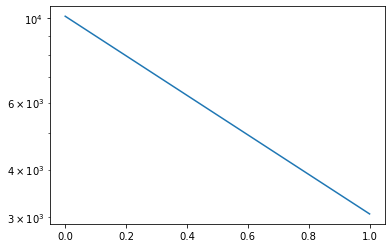

In [125]:
with open("data/adj_relat_dc.txt", 'rb') as f:
        adj_relat = pickle.load(f)
np.fill_diagonal(adj_relat.values, 0)

deg_relat = np.max(adj_relat[adj_relat.index])
unique, counts = np.unique(deg_relat, return_counts=True)
plt.semilogy(unique,counts)

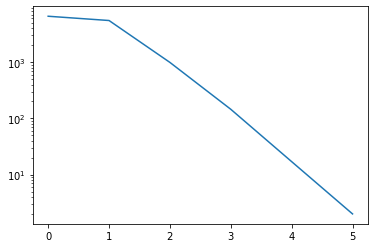

In [130]:
with open("data/adj_aff_dc.txt", 'rb') as f:
        adj_aff = pickle.load(f)
np.fill_diagonal(adj_aff.values, 0)

deg_aff = np.max(adj_aff[adj_aff.index])
unique, counts = np.unique(deg_aff, return_counts=True)
plt.semilogy(unique,counts)

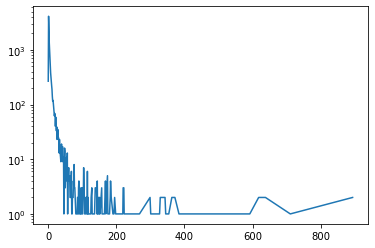

In [127]:
with open("data/adj_comics_dc.txt", 'rb') as f:
        adj_comics = pickle.load(f)
np.fill_diagonal(adj_comics.values, 0)

deg_comics = np.max(adj_comics[adj_comics.index])
unique, counts = np.unique(deg_comics, return_counts=True)
plt.semilogy(unique,counts)

In [124]:
save_tot_edges("dc", "50")
save_tot_edges("dc", "90")
save_tot_edges("dc", "")